Automatically created module for IPython interactive environment


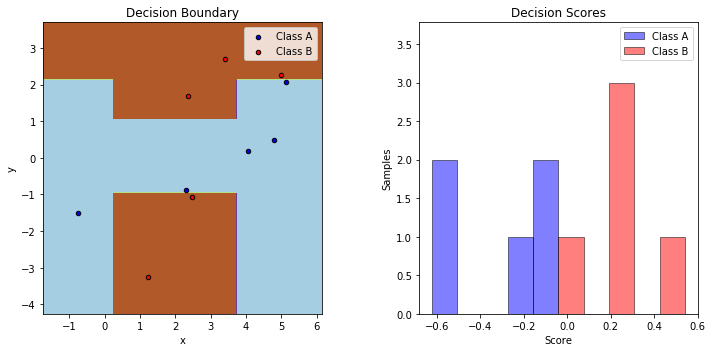

In [1]:
from sklearn import tree
import graphviz 
# Copied from 'sklearn two class Adaboost'
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=4, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=6, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))

y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=5)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()



In [2]:
# Since I am new to boosting, would like to visualize the process of the additive of weak learners.
# Will use 'two class adaboost' as an example to analyze the boosting process step by step
# Here is the Algorithm of AdaBoost....
# Initialize the observation weights Wi = 1/n, i = 1,2,...,n.
# For m = 1 to M:
#   (a) Fit a classifier Tm(x) to the training data using weights Wi.
#   (b) Compute error term :err(m) = sum(Wi*I(ci!=Tm(xi)))/sum(Wi)
#   (c) Compute alpha(m) = log((1-err(m))/err(m))
#   (d) Set Wi <-- Wi*exp(alpha(m)*I(ci!=Tm(xi))), i=1,2,...,n. Set a larger weight for the previously misclassified
#   observations
#   (e) renormalize Wi = Wi/sum(Wi)
#   Output C(x)= argmax(sumover m (alpha(m)*I(Tm(xi)=k))

In [3]:
# X has 2 features X0,X1
X

array([[ 2.29717124, -0.86515422],
       [ 2.46753646, -1.07650912],
       [-0.74694766, -1.51740678],
       [ 1.22387121, -3.25486724],
       [ 4.98940865,  2.25075447],
       [ 4.7907092 ,  0.47685323],
       [ 5.13694926,  2.06771575],
       [ 4.05990356,  0.18120228],
       [ 2.35312436,  1.68588718],
       [ 3.3907415 ,  2.69458491]])

In [4]:
y

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [5]:
# Initialize observation weight
weight0 = np.array([0.1]*10)
weight0

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [6]:
# Adaboost has an attribute 'estimators_' by which you can access each decision tree and visualize them
bdt.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1025899737, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1105291243, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1371072018, splitter='best'),
 DecisionTreeClassifier(class_weight=

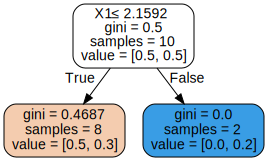

In [7]:
# First decision tree
dot_data = tree.export_graphviz(bdt.estimators_[0], out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [8]:
# First Decision Tree use X1<= 2.1592 as split criteria. gini is calculated as 1-p^2-q^2. So the gini for root is
# 1-0.5^2-0.5^2=0.5(p and q are the success and failure ratio and in this case are both 0.5 since we have balanced dataset)
# the initial weight for all samples are 1/n = 0.1 (n=10), so root value = [0.5,0.5]
# Now let's look at the subnodes after the split. Firstly Let's check the left subnode with gini=0.4687
print 'The below observations are belong to the left subnode:'
print np.where(X[:,1]<=2.1592)
print
print 'The classfication of these observations are:'
print y[X[:,1]<=2.1592]
# As we can see below, there are 8 observations in this subnode; There are 5 observations are with class 0 and
# 3 observations are with class 1 so the weight value = [0.5,0.3] indicating 3 observations got misclassified. 

The below observations are belong to the left subnode:
(array([0, 1, 2, 3, 5, 6, 7, 8], dtype=int64),)

The classfication of these observations are:
[0 1 0 1 0 0 0 1]


In [9]:
# Next Let's look at the right subnode.
print 'The below observations are belong to the right subnode:'
print np.where(~(X[:,1]<=2.1592))
print
print 'The classification of these observations are:'
print y[X[:,1]>2.1592]
# There are 2 observations in this subnonde; both of them are labeled class 1. The weight value = [0.0,0.2]

The below observations are belong to the right subnode:
(array([4, 9], dtype=int64),)

The classification of these observations are:
[1 1]


In [10]:
# the error term of the first decision tree is
print 'the misclassified observations are:'
print [1,3,8]
print 'the weight of these observations are:'
print [0.1,0.1,0.1]
misclassified = np.array([0.1,0.1,0.1])
err0 = misclassified.sum()/weight0.sum()
print 'The first error term err0 is:', err0
print
alpha0 = np.log((1-err0)/err0)
print 'The first alpha term alpla0 is:',alpha0


the misclassified observations are:
[1, 3, 8]
the weight of these observations are:
[0.1, 0.1, 0.1]
The first error term err0 is: 0.3

The first alpha term alpla0 is: 0.847297860387


In [11]:
# We can also cross verify the alpha0 value using method estimators_weight_
print 'The learner weight of first Decision Tree is:', bdt.estimator_weights_[0]
print 'The error of first Decision Tree is:', bdt.estimator_errors_[0]

The learner weight of first Decision Tree is: 0.847297860387
The error of first Decision Tree is: 0.3


In [12]:
# Now We need to update and renomalize the weight of all the observations, 
# Misclassified observations will be boosted in weights. 
print 'The sample weight after first round is:'
weight1 = np.copy(weight0)
weight1[[1,3,8]]=weight0[1]*np.exp(alpha0)
weight1 = weight1/weight1.sum()
print weight1
# It can be seen that observation 1,3,8 has been boosted in weights.

The sample weight after first round is:
[ 0.07142857  0.16666667  0.07142857  0.16666667  0.07142857  0.07142857
  0.07142857  0.07142857  0.16666667  0.07142857]


In [13]:
# The first stage decision function
print 'The first stage decision function is:'
for item in bdt.staged_decision_function(X):
    print item
    break
# The first predict
print 'The first predict is:'
for item in bdt.staged_predict(X):
    print item
    predict0=item
    break
# The first predict probability
print 'The first predict probability is:'
for item in bdt.staged_predict_proba(X):
    print item
    break

The first stage decision function is:
[-1. -1. -1. -1.  1. -1. -1. -1. -1.  1.]
The first predict is:
[0 0 0 0 1 0 0 0 0 1]
The first predict probability is:
[[ 0.5621765   0.4378235 ]
 [ 0.5621765   0.4378235 ]
 [ 0.5621765   0.4378235 ]
 [ 0.5621765   0.4378235 ]
 [ 0.26894142  0.73105858]
 [ 0.5621765   0.4378235 ]
 [ 0.5621765   0.4378235 ]
 [ 0.5621765   0.4378235 ]
 [ 0.5621765   0.4378235 ]
 [ 0.26894142  0.73105858]]


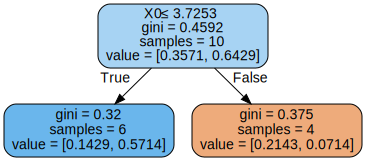

In [14]:
# Next, the second round
dot_data = tree.export_graphviz(bdt.estimators_[1], out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [15]:
# First Second Tree use X0<= 3.7253 as split criteria.
# Look at root weight value
print 'Summed class0 weights:',weight1[y==0].sum()
print 'Summed class1 weights:',weight1[y==1].sum()

Summed class0 weights: 0.357142857143
Summed class1 weights: 0.642857142857


In [16]:
# Root gini can be calculated:
print '2nd round root gini is:', 1-0.3571**2-0.6429**2

2nd round root gini is: 0.45915918


In [17]:
# Look at left subnode
print 'The below observations are belong to the left subnode:'
print np.where(X[:,0]<=3.7253)
print
print 'The classfication of these observations are:'
print y[X[:,0]<=3.7253]
# As we can see below, there are 6 observations in this subnode; There are 2 observations are with class 0 and
# 4 observations are with class 1 so we can calculate the weight value
print 'Weight sum for class0 is:', weight1[(X[:,0]<=3.7253)&(y==0)].sum()
print 'Weight sum for class1 is:', weight1[(X[:,0]<=3.7253)&(y==1)].sum()
# Subnode Gini can be calculated with nomalized weight sums

The below observations are belong to the left subnode:
(array([0, 1, 2, 3, 8, 9], dtype=int64),)

The classfication of these observations are:
[0 1 0 1 1 1]
Weight sum for class0 is: 0.142857142857
Weight sum for class1 is: 0.571428571429


In [18]:
# Look at Right subnode
print 'The below observations are belong to the right subnode:'
print np.where(X[:,0]>3.7253)
print
print 'The classfication of these observations are:'
print y[X[:,0]>3.7253]

The below observations are belong to the right subnode:
(array([4, 5, 6, 7], dtype=int64),)

The classfication of these observations are:
[1 0 0 0]


In [19]:
# the error term of the second decision tree is
print 'the misclassified observations are:'
print [0,2,4]
print 'the weight of these observations are:'
print weight1[[0,2,4]]
misclassified = weight1[[0,2,4]]
err1 = misclassified.sum()/weight1.sum()
print 'The error term err1 is:', err1
print
alpha1 = np.log((1-err1)/err1)
print 'The alpha term alpla1 is:',alpha1


the misclassified observations are:
[0, 2, 4]
the weight of these observations are:
[ 0.07142857  0.07142857  0.07142857]
The error term err1 is: 0.214285714286

The alpha term alpla1 is: 1.29928298413


In [20]:
# We can also cross verify the alpha1 value using method estimators_weight_
print 'The learner weight of second Decision Tree is:', bdt.estimator_weights_[1]
print 'The error of second Decision Tree is:', bdt.estimator_errors_[1]

The learner weight of second Decision Tree is: 1.29928298413
The error of second Decision Tree is: 0.214285714286


In [21]:
# Now We need to update and renomalize the weight of all the observations, 
# Misclassified observations will be boosted in weights. 
print 'The sample weight after second round is:'
weight2 = np.copy(weight1)
weight2[[0,2,4]]=weight1[0]*np.exp(alpha1)
weight2 = weight2/weight2.sum()
print weight2
# It can be seen that observation 0,2,4 has been boosted in weights.

The sample weight after second round is:
[ 0.16666667  0.10606061  0.16666667  0.10606061  0.16666667  0.04545455
  0.04545455  0.04545455  0.10606061  0.04545455]


In [22]:
# The second stage decision function
print 'The second stage decision function is:'
for idx,item in enumerate(bdt.staged_decision_function(X)):
    if idx==1:
        print item
        break
# The second predict
print 'The second predict is:'
for idx,item in enumerate(bdt.staged_predict(X)):
    if idx==1:
        print item
        predict1=item
        break
# The second predict probability
print 'The second predict probability is:'
for idx,item in enumerate(bdt.staged_predict_proba(X)):
    if idx==1:
        print item
        break

The second stage decision function is:
[ 0.21056049  0.21056049  0.21056049  0.21056049 -0.21056049 -1.         -1.
 -1.          0.21056049  1.        ]
The second predict is:
[1 1 1 1 0 0 0 0 1 1]
The second predict probability is:
[[ 0.43426073  0.56573927]
 [ 0.43426073  0.56573927]
 [ 0.43426073  0.56573927]
 [ 0.43426073  0.56573927]
 [ 0.47699634  0.52300366]
 [ 0.59900478  0.40099522]
 [ 0.59900478  0.40099522]
 [ 0.59900478  0.40099522]
 [ 0.43426073  0.56573927]
 [ 0.319105    0.680895  ]]


In [23]:
predict0[predict0==0]=-1

In [24]:
predict1[predict1==0]=-1

In [25]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

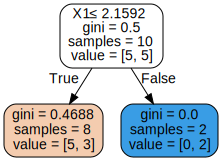

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [27]:
clf.predict(X)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [28]:
clf.predict_proba(X)*alpha0

array([[ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.        ,  0.84729786],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.        ,  0.84729786]])

In [34]:
n_classes=bdt.n_classes_
proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(bdt.estimators_,
                                                bdt.estimator_weights_))

proba /= bdt.estimator_weights_.sum()
print proba
print
proba = np.exp((1. / (n_classes - 1)) * proba)
print proba
print
normalizer = proba.sum(axis=1)[:, np.newaxis]
print normalizer
print


[[ 0.50473227  0.49526773]
 [ 0.37637722  0.62362278]
 [ 0.50932407  0.49067593]
 [ 0.37637722  0.62362278]
 [ 0.43413744  0.56586256]
 [ 0.63462844  0.36537156]
 [ 0.53039748  0.46960252]
 [ 0.63462844  0.36537156]
 [ 0.40050132  0.59949868]
 [ 0.30424128  0.69575872]]

[[ 1.65654196  1.6409375 ]
 [ 1.45699664  1.86567474]
 [ 1.66416595  1.63341992]
 [ 1.45699664  1.86567474]
 [ 1.54363102  1.76096606]
 [ 1.88632112  1.44104935]
 [ 1.69960773  1.59935836]
 [ 1.88632112  1.44104935]
 [ 1.49257276  1.82120557]
 [ 1.3555961   2.0052299 ]]

[[ 3.29747946]
 [ 3.32267138]
 [ 3.29758588]
 [ 3.32267138]
 [ 3.30459708]
 [ 3.32737047]
 [ 3.29896609]
 [ 3.32737047]
 [ 3.31377833]
 [ 3.360826  ]]



In [35]:
proba.sum(axis=1)

array([ 3.29747946,  3.32267138,  3.29758588,  3.32267138,  3.30459708,
        3.32737047,  3.29896609,  3.32737047,  3.31377833,  3.360826  ])

In [33]:
bdt.predict_proba(X)

array([[ 0.50236612,  0.49763388],
       [ 0.43850158,  0.56149842],
       [ 0.5046619 ,  0.4953381 ],
       [ 0.43850158,  0.56149842],
       [ 0.46711626,  0.53288374],
       [ 0.56691046,  0.43308954],
       [ 0.51519406,  0.48480594],
       [ 0.56691046,  0.43308954],
       [ 0.45041418,  0.54958582],
       [ 0.40335206,  0.59664794]])

In [ ]:
normalizer[normalizer == 0.0] = 1.0
proba /= normalizer
print proba

In [44]:
norm = bdt.estimator_weights_[0]
proba = bdt.estimators_[0].predict_proba(X) * norm
real_proba = np.exp((1. / (n_classes - 1)) * (proba / norm))
normalizer = real_proba.sum(axis=1)[:, np.newaxis]


In [46]:
normalizer[normalizer == 0.0] = 1.0
real_proba /= normalizer

In [39]:
bdt.estimators_[0].predict_proba(X)*norm

array([[ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.        ,  0.84729786],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.52956116,  0.3177367 ],
       [ 0.        ,  0.84729786]])

In [53]:
bdt.estimators_[0].predict(X)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [58]:
temp = (bdt.estimators_[0].predict(X)==bdt.classes_[:,np.newaxis]).T

In [57]:
bdt.classes_[:,np.newaxis]

array([[0],
       [1]])

In [59]:
pred = temp*alpha0

In [60]:
pred

array([[ 0.84729786,  0.        ],
       [ 0.84729786,  0.        ],
       [ 0.84729786,  0.        ],
       [ 0.84729786,  0.        ],
       [ 0.        ,  0.84729786],
       [ 0.84729786,  0.        ],
       [ 0.84729786,  0.        ],
       [ 0.84729786,  0.        ],
       [ 0.84729786,  0.        ],
       [ 0.        ,  0.84729786]])

In [62]:
pred[:,0]*=-1

In [63]:
pred

array([[-0.84729786,  0.        ],
       [-0.84729786,  0.        ],
       [-0.84729786,  0.        ],
       [-0.84729786,  0.        ],
       [-0.        ,  0.84729786],
       [-0.84729786,  0.        ],
       [-0.84729786,  0.        ],
       [-0.84729786,  0.        ],
       [-0.84729786,  0.        ],
       [-0.        ,  0.84729786]])

In [ ]:

        classes = self.classes_[:, np.newaxis]
        pred = None
        norm = 0.

        for weight, estimator in zip(self.estimator_weights_,
                                     self.estimators_):
            norm += weight

            if self.algorithm == 'SAMME.R':
                # The weights are all 1. for SAMME.R
                current_pred = _samme_proba(estimator, n_classes, X)
            else:  # elif self.algorithm == "SAMME":
                current_pred = estimator.predict(X)
                current_pred = (current_pred == classes).T * weight

            if pred is None:
                pred = current_pred
            else:
                pred += current_pred

            if n_classes == 2:
                tmp_pred = np.copy(pred)
                tmp_pred[:, 0] *= -1
                yield (tmp_pred / norm).sum(axis=1)
            else:
                yield pred / norm


In [70]:
classes =  bdt.classes_[:,np.newaxis]
pred = None
norm = 0

for weight, estimator in zip(bdt.estimator_weights_,bdt.estimators_):
    norm += weight
    print 'current norm is: ',norm
    print
    current_pred = estimator.predict(X)
    print 'current pred is: ',current_pred
    current_pred = (current_pred == classes).T * weight
    print 'weighted pred is: ', current_pred
    
    if pred is None:
        pred = current_pred
    else:
        pred += current_pred
    print 'summed pred is: ', pred
    
    if n_classes==2:
        tmp_pred = np.copy(pred)
        tmp_pred[:,0] *= -1
        print (tmp_pred/norm).sum(axis=1)
        

current norm is:  0.847297860387

current pred is:  [0 0 0 0 1 0 0 0 0 1]
weighted pred is:  [[ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.          0.84729786]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.          0.84729786]]
summed pred is:  [[ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.          0.84729786]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.84729786  0.        ]
 [ 0.          0.84729786]]
[-1. -1. -1. -1.  1. -1. -1. -1. -1.  1.]
current norm is:  2.14658084452

current pred is:  [1 1 1 1 0 0 0 0 1 1]
weighted pred is:  [[ 0.          1.29928298]
 [ 0.          1.29928298]
 [ 0.          1.29928298]
 [ 0.          1.29928298]
 [ 1.29928298  0.        ]
 [ 1.29928298  0.        ]
 [ 1.29928298  0.        ]
 [ 1.29928298  0.        

In [65]:
n_classes

2